# Fraud Detection of financial transactions


## 1. Problem Definition 

###    _This project addresses the challenge of building a predictive model for a highly class-imbalanced dataset, where traditional evaluation metrics like accuracy may fail to reflect true model performance. The core problems include:_

###   _1. Class Imbalance: The target variable has significant disparity between classes, likely causing models to bias toward the majority class._

###   _2. Metric Selection: Standard metrics (e.g., accuracy) may be misleading, requiring careful consideration of precision, recall, and AUC to properly evaluate model effectiveness._

###   _3. Algorithm Suitability: Different machine learning algorithms (e.g., Logistic Regression, Random Forest, Gradient Boosting) may handle class imbalance differently, requiring systematic comparison._

### _The project aims to_
###    _- Identify optimal evaluation metrics for imbalanced data_
###    _- Compare model performance beyond surface-level accuracy_
###    _- Develop strategies to mitigate class imbalance effects_


## 2. Data Preprocessing

### _In this part of the project we are going to familiarize with our dataset, thus we are going to run some EDA to understandd the data. In the second part of this section we are going to do the data normalization which will be explain the respective subsection._

### i. Explaratory Data Analysis

In [186]:
#importing the libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [241]:
# importing the data into a dataframe

fraud_data = pd.read_csv("Fraud Data.csv")
fraud_data.head()

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [3]:
#Shape of the data

fraud_data.shape

(786363, 30)

In [27]:
#Viewing columns and their data types
print("Dataset Column data types:\n")
fraud_data.info()


Dataset Column data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                786363 non-null  int64  
 1   accountNumber             786363 non-null  int64  
 2   customerId                786363 non-null  int64  
 3   creditLimit               786363 non-null  int64  
 4   availableMoney            786363 non-null  float64
 5   transactionDateTime       786363 non-null  object 
 6   transactionAmount         786363 non-null  float64
 7   merchantName              786363 non-null  object 
 8   acqCountry                781801 non-null  object 
 9   merchantCountryCode       785639 non-null  object 
 10  posEntryMode              782309 non-null  float64
 11  posConditionCode          785954 non-null  float64
 12  merchantCategoryCode      786363 non-null  object 
 13  currentExpDate 

In [39]:
#Descriptive Statistics of the data
print("\nDataset Basic Statistics:")
fraud_data.describe().T


Dataset Basic Statistics:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,786363.0,3.931810e+05,2.270036e+05,0.000000e+00,1.965905e+05,3.931810e+05,5.897715e+05,7.863620e+05
accountNumber,786363.0,5.372326e+08,2.554211e+08,1.000881e+08,3.301333e+08,5.074561e+08,7.676200e+08,9.993896e+08
customerId,786363.0,5.372326e+08,2.554211e+08,1.000881e+08,3.301333e+08,5.074561e+08,7.676200e+08,9.993896e+08
creditLimit,786363.0,1.075946e+04,1.163617e+04,2.500000e+02,5.000000e+03,7.500000e+03,1.500000e+04,5.000000e+04
availableMoney,786363.0,6.250725e+03,8.880784e+03,-1.005630e+03,1.077420e+03,3.184860e+03,7.500000e+03,5.000000e+04
transactionAmount,786363.0,1.369858e+02,1.477256e+02,0.000000e+00,3.365000e+01,8.790000e+01,1.914800e+02,2.011540e+03
posEntryMode,782309.0,9.049943e+00,1.677413e+01,2.000000e+00,2.000000e+00,5.000000e+00,9.000000e+00,9.000000e+01
posConditionCode,785954.0,3.271980e+00,9.809023e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01
cardCVV,786363.0,5.444673e+02,2.615242e+02,1.000000e+02,3.100000e+02,5.350000e+02,7.850000e+02,9.980000e+02
enteredCVV,786363.0,5.441839e+02,2.615513e+02,0.000000e+00,3.100000e+02,5.350000e+02,7.850000e+02,9.980000e+02


##### By looking at the count metric it shows that we have 5 blank columns that we need to get rid of in our data, which are the last columns, also supported by running the fraud.info code we get columns that have zero non null values

In [41]:
# Dataset isFraud Distribution 
print("\nDependent/Target Column data distribution:")
fraud_data["isFraud"].value_counts()

#fraud["isFraud"].sum()


Dependent/Target Column data distribution:


isFraud
False    773946
True      12417
Name: count, dtype: int64

there are 77396 non fraud transactions in our dataset

In [4]:
# Dataset isFraud Distribution 
print("\nDependent/Target Column data distribution:")
fraud_data["isFraud"].value_counts(normalize = True)

#fraud["isFraud"].sum()


Dependent/Target Column data distribution:


isFraud
False    0.98421
True     0.01579
Name: proportion, dtype: float64

### _98% of the data are non fraud transactions where only 2% are fraudulent transactions. Lets bear in mind that the ojective of the project is to build a model that is able to detect a fraudulent transaction from the financial institution customers due to identity theft card cloning or malicious online transactions and scammers._ 

### _The challenge at hand is that we have more of non fraud transactions than those transactions that we want to build our model for in the first place. This is called an imbalance in our classes, this inevitably suggest that a potential model build from this type of a dataset is less likely to detect a fraudulent case since in its training stages it would have been exposed to a few fraud cases. Hence it's really not sure what a fraudulent transaction looks like, in a nutshell such a model is highly likely to classify a fraudulent transaction as a normal transaction, a phenomenon known as False Negative in statistics._

### _We will look into resolving these imbalances when we get to the model preprocessing phase._

In [242]:
# Lets create a copy to run our analysis on

fraud1 = fraud_data.copy()
fraud1.head()

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [6]:
# Drooping null value columns

fraud1.dropna(axis = 1, inplace = True)
fraud1.head()

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,rideshare,Jun-23,3/14/2015,3/14/2015,414,414,1803,0.0,False,False,False
1,1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,entertainment,Feb-24,3/14/2015,3/14/2015,486,486,767,0.0,True,False,False
2,2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,mobileapps,Aug-25,3/14/2015,3/14/2015,486,486,767,0.0,False,False,False
3,3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,mobileapps,Aug-25,3/14/2015,3/14/2015,486,486,767,0.0,False,False,False
4,4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,fastfood,Oct-29,8/6/2015,8/6/2015,885,885,3143,0.0,True,False,False


### _There are some columns that i think may not be of help to us, these are columns like_

    a. accountNumber - This we don't need it
    b. customerId - this is not needed (if we had vast data on each customerId it would have been fun to build a model based on customer buying patterns)
    c. merchantName - This is not needed
    d. merchantCategoryCode - this is not needed as well 

### _And so on will leave only the needed columns_

In [10]:
# Looking at the list if all columns

fraud1.columns.tolist()

['Unnamed: 0',
 'accountNumber',
 'customerId',
 'creditLimit',
 'availableMoney',
 'transactionDateTime',
 'transactionAmount',
 'merchantName',
 'merchantCategoryCode',
 'currentExpDate',
 'accountOpenDate',
 'dateOfLastAddressChange',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'currentBalance',
 'cardPresent',
 'expirationDateKeyInMatch',
 'isFraud']

In [13]:
#Dropping all unwanted columns

fraud1.drop(columns = [
 "accountNumber",
 "customerId",
 "merchantName",
 "merchantCategoryCode",
 "currentExpDate",
 "accountOpenDate",
 "dateOfLastAddressChange",
 "cardCVV",
 "enteredCVV",
 "cardLast4Digits",
 "cardPresent",
 "expirationDateKeyInMatch"], inplace = True)
fraud1.head()

,Unnamed: 0,creditLimit,availableMoney,transactionDateTime,transactionAmount,currentBalance,isFraud
0,0,5000,5000.0,2016-08-13T14:27:32,98.55,0.0,False
1,1,5000,5000.0,2016-10-11T05:05:54,74.51,0.0,False
2,2,5000,5000.0,2016-11-08T09:18:39,7.47,0.0,False
3,3,5000,5000.0,2016-12-10T02:14:50,7.47,0.0,False
4,4,5000,5000.0,2016-03-24T21:04:46,71.18,0.0,False


### _Now that we have trimmed the columns, we also need to drop in index as we don't need it. We also need to to extract just the hour of transaction from the transactionDateTime column and drop the column._

In [25]:
#Dropping the "Unnamed: 0" column

fraud1.drop("Unnamed: 0", axis = 1, inplace = True)
fraud1.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,currentBalance,isFraud
0,5000,5000.0,2016-08-13T14:27:32,98.55,0.0,False
1,5000,5000.0,2016-10-11T05:05:54,74.51,0.0,False
2,5000,5000.0,2016-11-08T09:18:39,7.47,0.0,False
3,5000,5000.0,2016-12-10T02:14:50,7.47,0.0,False
4,5000,5000.0,2016-03-24T21:04:46,71.18,0.0,False


### _Realizing that the transactionDateTime column is of datatype object and not a datetime type we need to convert it to date and extract the hour of transaction, since i think its important in our model._

In [39]:
# Converting the "transactionDateTime" column to datetime datatype


fraud1["transactionDateTime"] = pd.to_datetime(fraud1["transactionDateTime"])
fraud1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   creditLimit          786363 non-null  int64         
 1   availableMoney       786363 non-null  float64       
 2   transactionDateTime  786363 non-null  datetime64[ns]
 3   transactionAmount    786363 non-null  float64       
 4   currentBalance       786363 non-null  float64       
 5   isFraud              786363 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 30.7 MB


In [41]:
# Nowing extracting the hour from the "transactionDateTime" column

fraud1["transactionHour"] = fraud1["transactionDateTime"].dt.hour
fraud1.drop("transactionDateTime",axis = 1, inplace = True)
fraud1.head()

,creditLimit,availableMoney,transactionAmount,currentBalance,isFraud,transactionHour
0,5000,5000.0,98.55,0.0,False,14
1,5000,5000.0,74.51,0.0,False,5
2,5000,5000.0,7.47,0.0,False,9
3,5000,5000.0,7.47,0.0,False,2
4,5000,5000.0,71.18,0.0,False,21


In [173]:
# Now lets look at the clean data to check for null vakues 

print("Checking Null values in the columns:\n", fraud1.isnull().sum())
print("\nChecking for data types:")
fraud1.info()

print("\nChecking for dataframe shape:")
fraud1.shape

Checking Null values in the columns:
 creditLimit          0
availableMoney       0
transactionAmount    0
currentBalance       0
isFraud              0
transactionHour      0
dtype: int64

Checking for data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   creditLimit        786363 non-null  int64  
 1   availableMoney     786363 non-null  float64
 2   transactionAmount  786363 non-null  float64
 3   currentBalance     786363 non-null  float64
 4   isFraud            786363 non-null  bool   
 5   transactionHour    786363 non-null  int32  
dtypes: bool(1), float64(3), int32(1), int64(1)
memory usage: 27.7 MB

Checking for dataframe shape:


(786363, 6)

### _We now need to look at the distributions of our variables in visual manner_

In [67]:
# Transactions by the hour of the day
trans = fraud1.iloc[ : , [2, 5]].groupby("transactionHour").sum().sort_values(by = "transactionAmount", ascending = False)
trans

,transactionAmount
transactionHour,
14,4581619.67
15,4566823.46
23,4533654.72
8,4522788.18
16,4520250.68
22,4501272.36
11,4497607.84
10,4494377.08
0,4488709.76


C:\Users\Windows 11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows 11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


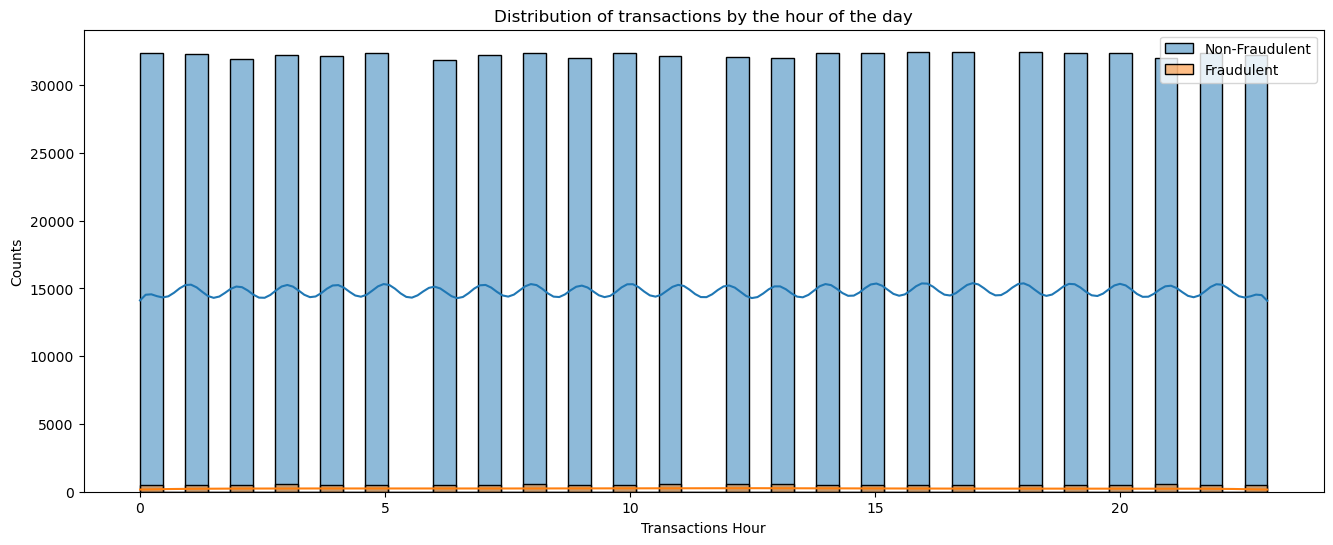

In [137]:
# Time Distribution of transactions by the hour of the day
plt.figure(figsize = (16, 6))
sns.histplot(fraud1[fraud1["isFraud"] == False]["transactionHour"], label = "Non-Fraudulent", bins = 50,  kde = True)
sns.histplot(fraud1[fraud1["isFraud"] == True]["transactionHour"], label = "Fraudulent", bins = 50,  kde = True)
plt.title("Distribution of transactions by the hour of the day")
plt.xlabel("Transactions Hour")
plt.ylabel("Counts")
plt.legend()
plt.show()

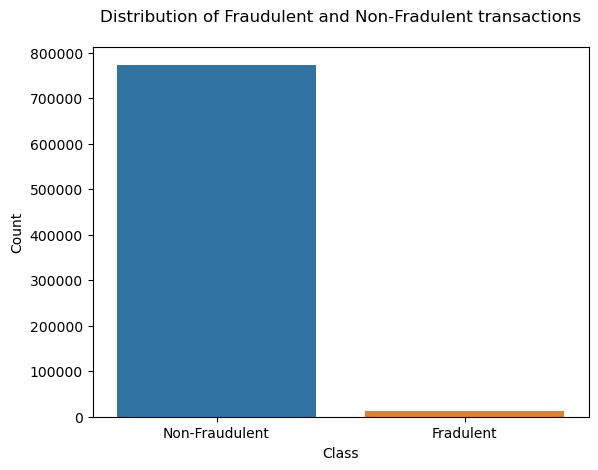

In [104]:
# Visualization of fraudulent and non fraudulent transactions

sns.countplot(x = "isFraud", data = fraud1)
plt.title("Distribution of Fraudulent and Non-Fradulent transactions\n")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks = [0, 1], labels = ["Non-Fraudulent","Fradulent"])
plt.show()

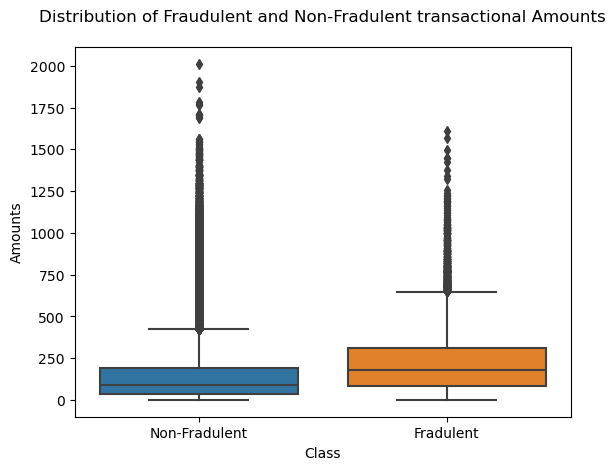

In [122]:
# Visualization of fraudulent and non fraudulent transactions amounts

sns.boxplot(x = "isFraud", y = "transactionAmount", data = fraud1)
plt.title("Distribution of Fraudulent and Non-Fradulent transactional Amounts\n")
plt.xlabel("Class")
plt.ylabel("Amounts")
plt.xticks(ticks = [0, 1], labels = ["Non-Fradulent","Fradulent"])
plt.show()

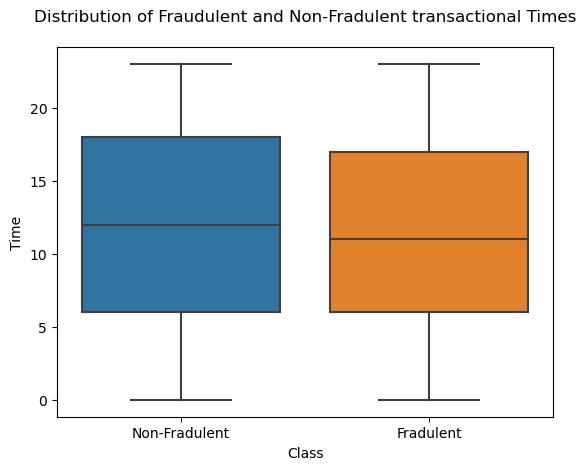

In [174]:
# Visualization of fraudulent and non fraudulent transactions amounts

sns.boxplot(x = "isFraud", y = "transactionHour", data = fraud1)
plt.title("Distribution of Fraudulent and Non-Fradulent transactional Times\n")
plt.xlabel("Class")
plt.ylabel("Time")
plt.xticks(ticks = [0, 1], labels = ["Non-Fradulent","Fradulent"])
plt.show()

In [151]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

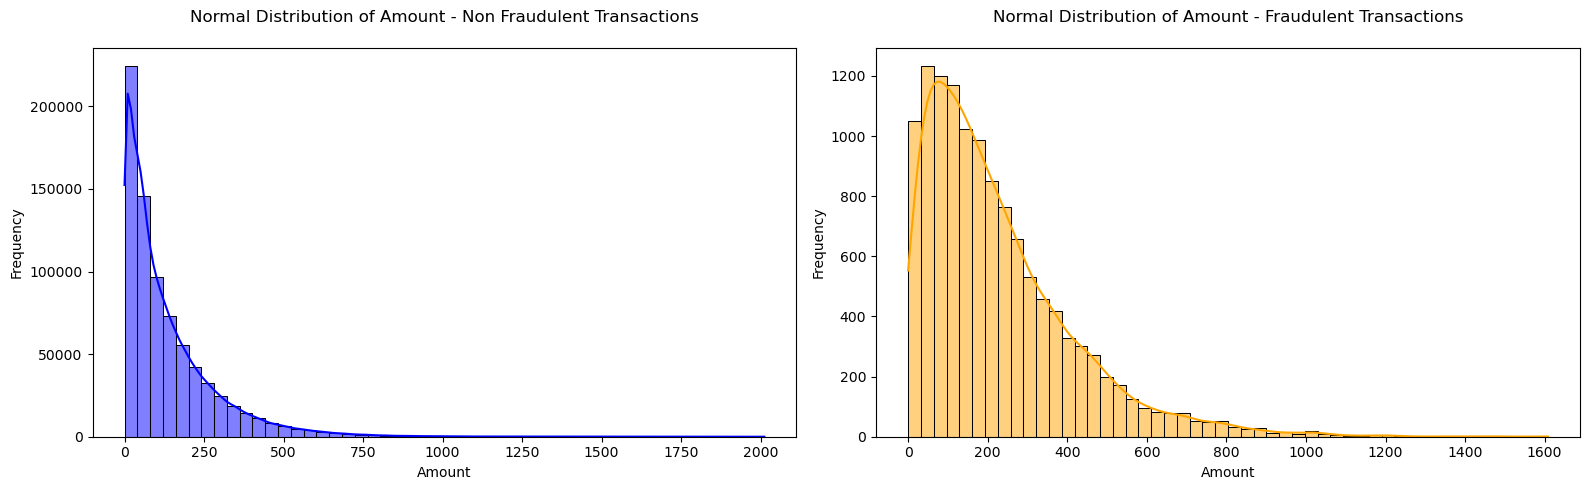

In [154]:
# Normal Distributions of Fraudulent and Non Fraudulent cases

plt.figure(figsize = (16, 5))

plt.subplot(1, 2, 1)
sns.histplot(fraud1[fraud1["isFraud"] == False]["transactionAmount"], bins = 50, color = "blue", kde = True)
plt.title("Normal Distribution of Amount - Non Fraudulent Transactions\n")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.histplot(fraud1[fraud1["isFraud"] == True]["transactionAmount"], bins = 50, color = "orange", kde = True)
plt.title("Normal Distribution of Amount - Fraudulent Transactions\n")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

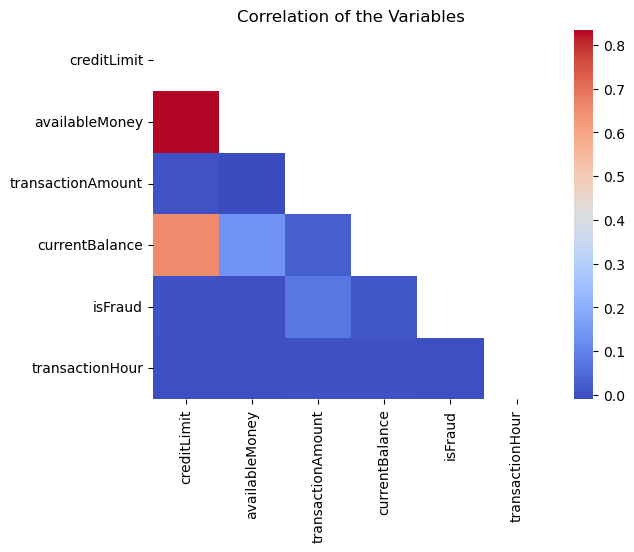

In [187]:
# Correlation matrix heatmap

corr = fraud1.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, cmap= "coolwarm", annot = True, fmt = ".2f")
plt.title("Correlation of the Variables")
plt.show()

In [206]:
# looking at the highly correlated features

corr[corr["isFraud"] > 0.2].index.to_list()

['isFraud']

In [449]:
corr["isFraud"]

creditLimit          0.003108
availableMoney      -0.001538
transactionAmount    0.075651
currentBalance       0.007715
isFraud              1.000000
transactionHour     -0.000867
Name: isFraud, dtype: float64

### _From the immediately above analysis we realize that only "isFraud has a high correlation, because its being  compared against itself"_

### NB transactionHour column is later dropped in section 4

## ii. Data Preprocessing

### 1. _We start by handing missing values but in this case we checked before and we not have them: if we had them fraud1.dropna(inplace = True)_
### 2. _If we had missing values in the next step would be to replace them using: fraud1.fillna(fraud1.mean(), inplace = True)_
### 3. _Encoding categorical values - this is a sitation where we have columns that are categorical in nature and we have to convert them to numerical labels so that the computer can read them_
### 4. _We have to convert our "isFraud" column to numeric, ans since its a boolean in nature with True and False its easy we just convert to 0 and 1_



#### _NB: I have made an oversight with 1 column that i then thought could be important in this model and thus the merchantCategory code which basically indicates the type of our where a transaction was made eg a coffee shop or retail outlet. I think this feature is very key in this model hence I will add it at this stage and since it is a categorical column i will one hot encoding to concvert from categories to ones and zeros, which is the language that the computer can understand._

In [217]:
# so we start checking out the column

print("Null values in the column:\n", fraud["merchantCategoryCode"].isnull().sum())
print("\nCategories in the column:\n", fraud["merchantCategoryCode"].value_counts())

Null values in the column:
 0

Categories in the column:
 merchantCategoryCode
online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: count, dtype: int64


### _The merchant category column has no missing values, and we can see that most of the transactions have taken place in online_retail with the least in cable/phone category_

In [260]:
fraud2 = fraud_data.copy()
fraud2.head()

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [261]:
fraud2.drop(columns = [
 "accountNumber",
 "customerId",
 "merchantName",
 "Unnamed: 0",
 "currentExpDate",
 "accountOpenDate",
 "dateOfLastAddressChange",
 "cardCVV",
 "enteredCVV",
 "cardLast4Digits",
 "cardPresent",
 "expirationDateKeyInMatch"], inplace = True)
fraud2.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd,isFraud
0,5000,5000.0,2016-08-13T14:27:32,98.55,US,US,2.0,1.0,rideshare,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,False
1,5000,5000.0,2016-10-11T05:05:54,74.51,US,US,9.0,1.0,entertainment,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,False
2,5000,5000.0,2016-11-08T09:18:39,7.47,US,US,9.0,1.0,mobileapps,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,False
3,5000,5000.0,2016-12-10T02:14:50,7.47,US,US,9.0,1.0,mobileapps,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,False
4,5000,5000.0,2016-03-24T21:04:46,71.18,US,US,2.0,1.0,fastfood,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,False


In [262]:
fraud2.dropna(axis = 1, inplace = True)
fraud2.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantCategoryCode,currentBalance,isFraud
0,5000,5000.0,2016-08-13T14:27:32,98.55,rideshare,0.0,False
1,5000,5000.0,2016-10-11T05:05:54,74.51,entertainment,0.0,False
2,5000,5000.0,2016-11-08T09:18:39,7.47,mobileapps,0.0,False
3,5000,5000.0,2016-12-10T02:14:50,7.47,mobileapps,0.0,False
4,5000,5000.0,2016-03-24T21:04:46,71.18,fastfood,0.0,False


In [263]:
# Converting date column to hour

fraud2["transactionDateTime"] = pd.to_datetime(fraud2["transactionDateTime"])
fraud2["transactionHour"] = fraud2["transactionDateTime"].dt.hour
fraud2.drop("transactionDateTime", axis = 1, inplace = True)
fraud2.head()

,creditLimit,availableMoney,transactionAmount,merchantCategoryCode,currentBalance,isFraud,transactionHour
0,5000,5000.0,98.55,rideshare,0.0,False,14
1,5000,5000.0,74.51,entertainment,0.0,False,5
2,5000,5000.0,7.47,mobileapps,0.0,False,9
3,5000,5000.0,7.47,mobileapps,0.0,False,2
4,5000,5000.0,71.18,fastfood,0.0,False,21


### _The merchant category column has been successfully brought back now let's use One Hot Encoding to convert categoties into numbers_

In [268]:
# First we need to convert our "isFraud" column to 1's and 0's since the column is of boolean type

fraud2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   creditLimit           786363 non-null  int64  
 1   availableMoney        786363 non-null  float64
 2   transactionAmount     786363 non-null  float64
 3   merchantCategoryCode  786363 non-null  object 
 4   currentBalance        786363 non-null  float64
 5   isFraud               786363 non-null  bool   
 6   transactionHour       786363 non-null  int32  
dtypes: bool(1), float64(3), int32(1), int64(1), object(1)
memory usage: 33.7+ MB


### _First we check if the operation will not mess up our data_

In [269]:
# What the column will look like after data type conversion
fraud2["isFraud"].astype(int).value_counts()

isFraud
0    773946
1     12417
Name: count, dtype: int64

In [270]:
# Looking at the original column values
fraud2["isFraud"].value_counts()

isFraud
False    773946
True      12417
Name: count, dtype: int64

In [271]:
# The operation will not affect our data hence we effect inplace = True

fraud2["isFraud"] = fraud2["isFraud"].astype(int)
fraud2.head(2)

,creditLimit,availableMoney,transactionAmount,merchantCategoryCode,currentBalance,isFraud,transactionHour
0,5000,5000.0,98.55,rideshare,0.0,0,14
1,5000,5000.0,74.51,entertainment,0.0,0,5


### _Using One Hot encoding_

In [300]:
# categories before one hot encoding
categories = fraud2["merchantCategoryCode"].value_counts().index.to_list()
categories

['online_retail',
 'fastfood',
 'entertainment',
 'food',
 'online_gifts',
 'rideshare',
 'hotels',
 'fuel',
 'subscriptions',
 'auto',
 'health',
 'personal care',
 'airline',
 'mobileapps',
 'online_subscriptions',
 'furniture',
 'food_delivery',
 'gym',
 'cable/phone']

In [316]:
# We create a copy again to effect the one hot encoding, since we'll drop the first category we may need to refer back to fraud2
fraud3 = fraud2.copy()

In [317]:
fraud3 = pd.get_dummies(fraud3, columns = ["merchantCategoryCode"], drop_first = True, prefix = "")
fraud3.head()

,creditLimit,availableMoney,transactionAmount,currentBalance,isFraud,transactionHour,_auto,_cable/phone,_entertainment,_fastfood,...,_gym,_health,_hotels,_mobileapps,_online_gifts,_online_retail,_online_subscriptions,_personal care,_rideshare,_subscriptions
0,5000,5000.0,98.55,0.0,0,14,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,5000,5000.0,74.51,0.0,0,5,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,5000,5000.0,7.47,0.0,0,9,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,5000,5000.0,7.47,0.0,0,2,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,5000,5000.0,71.18,0.0,0,21,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [318]:
# Cleaning the column names
fraud3.columns = fraud3.columns.str.replace("_", "")
fraud3.head()

,creditLimit,availableMoney,transactionAmount,currentBalance,isFraud,transactionHour,auto,cable/phone,entertainment,fastfood,...,gym,health,hotels,mobileapps,onlinegifts,onlineretail,onlinesubscriptions,personal care,rideshare,subscriptions
0,5000,5000.0,98.55,0.0,0,14,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,5000,5000.0,74.51,0.0,0,5,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,5000,5000.0,7.47,0.0,0,9,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,5000,5000.0,7.47,0.0,0,2,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,5000,5000.0,71.18,0.0,0,21,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [323]:
# checking column data type of the one hot coded columns for conversion to int type thus 1's and 0's
fraud3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   creditLimit          786363 non-null  int64  
 1   availableMoney       786363 non-null  float64
 2   transactionAmount    786363 non-null  float64
 3   currentBalance       786363 non-null  float64
 4   isFraud              786363 non-null  int32  
 5   transactionHour      786363 non-null  int32  
 6   auto                 786363 non-null  bool   
 7   cable/phone          786363 non-null  bool   
 8   entertainment        786363 non-null  bool   
 9   fastfood             786363 non-null  bool   
 10  food                 786363 non-null  bool   
 11  fooddelivery         786363 non-null  bool   
 12  fuel                 786363 non-null  bool   
 13  furniture            786363 non-null  bool   
 14  gym                  786363 non-null  bool   
 15  health           

In [353]:
# converting hot encoded columns from boolean data type to int

hot_encoded = ['auto', 'cable/phone', 'entertainment',
       'fastfood', 'food', 'fooddelivery', 'fuel', 'furniture', 'gym',
       'health', 'hotels', 'mobileapps', 'onlinegifts', 'onlineretail',
       'onlinesubscriptions', 'personal care', 'rideshare', 'subscriptions']

for column in hot_encoded:
    fraud3[column] = fraud3[column].astype(int)

fraud3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   creditLimit          786363 non-null  int64  
 1   availableMoney       786363 non-null  float64
 2   transactionAmount    786363 non-null  float64
 3   currentBalance       786363 non-null  float64
 4   isFraud              786363 non-null  int32  
 5   transactionHour      786363 non-null  int32  
 6   auto                 786363 non-null  int32  
 7   cable/phone          786363 non-null  int32  
 8   entertainment        786363 non-null  int32  
 9   fastfood             786363 non-null  int32  
 10  food                 786363 non-null  int32  
 11  fooddelivery         786363 non-null  int32  
 12  fuel                 786363 non-null  int32  
 13  furniture            786363 non-null  int32  
 14  gym                  786363 non-null  int32  
 15  health           

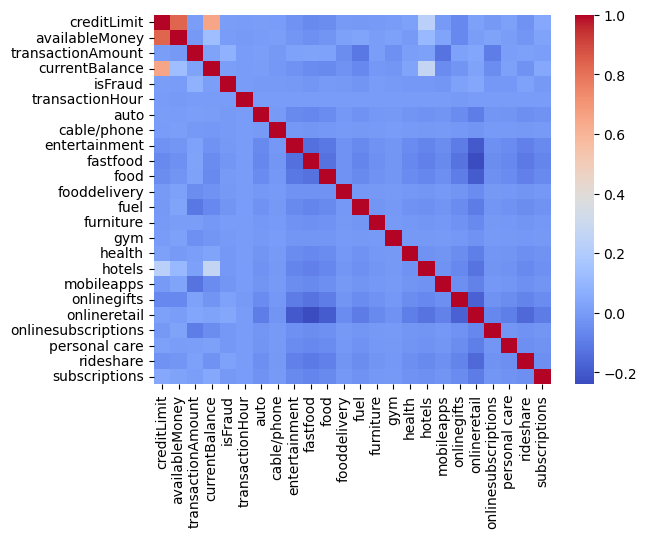

In [532]:
sns.heatmap(fraud3.corr(), cmap = "coolwarm")
plt.show()

### _In section 3 we relook at the features where we drop a chunk of the features and only focus on 4_

## 3. Data Transformation and Feature Engineering

### _Some steps of the preprocessing were done in this section, with corrections_

In [379]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score)
#from imblearn.over_sampling import SMOTEore,2. Data Preprocessing

In [380]:
from imblearn.over_sampling import SMOTE

In [453]:
fraud_data.columns.to_list()

['Unnamed: 0',
 'accountNumber',
 'customerId',
 'creditLimit',
 'availableMoney',
 'transactionDateTime',
 'transactionAmount',
 'merchantName',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'currentExpDate',
 'accountOpenDate',
 'dateOfLastAddressChange',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'transactionType',
 'echoBuffer',
 'currentBalance',
 'merchantCity',
 'merchantState',
 'merchantZip',
 'cardPresent',
 'posOnPremises',
 'recurringAuthInd',
 'expirationDateKeyInMatch',
 'isFraud']

In [455]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                786363 non-null  int64  
 1   accountNumber             786363 non-null  int64  
 2   customerId                786363 non-null  int64  
 3   creditLimit               786363 non-null  int64  
 4   availableMoney            786363 non-null  float64
 5   transactionDateTime       786363 non-null  object 
 6   transactionAmount         786363 non-null  float64
 7   merchantName              786363 non-null  object 
 8   acqCountry                781801 non-null  object 
 9   merchantCountryCode       785639 non-null  object 
 10  posEntryMode              782309 non-null  float64
 11  posConditionCode          785954 non-null  float64
 12  merchantCategoryCode      786363 non-null  object 
 13  currentExpDate            786363 non-null  o

In [456]:
trials = fraud_data.copy()

In [465]:
cols = trials.columns.to_list()
cols

['Unnamed: 0',
 'accountNumber',
 'customerId',
 'creditLimit',
 'availableMoney',
 'transactionDateTime',
 'transactionAmount',
 'merchantName',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'currentExpDate',
 'accountOpenDate',
 'dateOfLastAddressChange',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'transactionType',
 'echoBuffer',
 'currentBalance',
 'merchantCity',
 'merchantState',
 'merchantZip',
 'cardPresent',
 'posOnPremises',
 'recurringAuthInd',
 'expirationDateKeyInMatch',
 'isFraud']

In [467]:
for column in cols:
    if trials[column].dtype == object:
        trials.drop(columns = [column], axis = 1, inplace = True) 

trials

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000,5000.00,98.55,2.0,1.0,414,414,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,1,737265056,737265056,5000,5000.00,74.51,9.0,1.0,486,486,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,2,737265056,737265056,5000,5000.00,7.47,9.0,1.0,486,486,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,3,737265056,737265056,5000,5000.00,7.47,9.0,1.0,486,486,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,4,830329091,830329091,5000,5000.00,71.18,2.0,1.0,885,885,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,786358,732852505,732852505,50000,48904.96,119.92,90.0,1.0,936,936,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,786359,732852505,732852505,50000,48785.04,18.89,9.0,1.0,939,939,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,786360,732852505,732852505,50000,48766.15,49.43,2.0,1.0,936,936,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,786361,732852505,732852505,50000,48716.72,49.89,9.0,99.0,939,939,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


In [469]:
trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                786363 non-null  int64  
 1   accountNumber             786363 non-null  int64  
 2   customerId                786363 non-null  int64  
 3   creditLimit               786363 non-null  int64  
 4   availableMoney            786363 non-null  float64
 5   transactionAmount         786363 non-null  float64
 6   posEntryMode              782309 non-null  float64
 7   posConditionCode          785954 non-null  float64
 8   cardCVV                   786363 non-null  int64  
 9   enteredCVV                786363 non-null  int64  
 10  cardLast4Digits           786363 non-null  int64  
 11  echoBuffer                0 non-null       float64
 12  currentBalance            786363 non-null  float64
 13  merchantCity              0 non-null       f

In [470]:
trials.dropna(axis = 1, inplace = True)

In [471]:
trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                786363 non-null  int64  
 1   accountNumber             786363 non-null  int64  
 2   customerId                786363 non-null  int64  
 3   creditLimit               786363 non-null  int64  
 4   availableMoney            786363 non-null  float64
 5   transactionAmount         786363 non-null  float64
 6   cardCVV                   786363 non-null  int64  
 7   enteredCVV                786363 non-null  int64  
 8   cardLast4Digits           786363 non-null  int64  
 9   currentBalance            786363 non-null  float64
 10  cardPresent               786363 non-null  bool   
 11  expirationDateKeyInMatch  786363 non-null  bool   
 12  isFraud                   786363 non-null  bool   
dtypes: bool(3), float64(3), int64(7)
memory usag

In [472]:
trials.columns.to_list()

['Unnamed: 0',
 'accountNumber',
 'customerId',
 'creditLimit',
 'availableMoney',
 'transactionAmount',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'currentBalance',
 'cardPresent',
 'expirationDateKeyInMatch',
 'isFraud']

In [473]:
trials.drop(columns = ["Unnamed: 0", "cardPresent", "cardCVV", "enteredCVV", "accountNumber", "customerId"], inplace = True)

In [474]:
trials.columns.to_list()

['creditLimit',
 'availableMoney',
 'transactionAmount',
 'cardLast4Digits',
 'currentBalance',
 'expirationDateKeyInMatch',
 'isFraud']

In [475]:
trials.drop(columns = ["expirationDateKeyInMatch", "cardLast4Digits"], inplace = True)

In [476]:
trials.columns.to_list()

['creditLimit',
 'availableMoney',
 'transactionAmount',
 'currentBalance',
 'isFraud']

In [478]:
trials.corr()["isFraud"]

creditLimit          0.003108
availableMoney      -0.001538
transactionAmount    0.075651
currentBalance       0.007715
isFraud              1.000000
Name: isFraud, dtype: float64

In [488]:
# Making dependent coolumn a binary column - "isFraud" column

trials["isFraud"] = trials["isFraud"].astype(int)

In [490]:
# Independent variables

X = trials.drop(columns = "isFraud")
y = trials["isFraud"]

In [508]:
# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [509]:
# looking at data shapes

X_train.shape, y_train.shape

((550454, 4), (550454,))

In [510]:
X_test.shape, y_test.shape

((235909, 4), (235909,))

### _handling class imbalance using SMOTE_

In [557]:
# Applying SMOTE technique to resample the training data

smote = SMOTE(k_neighbors =5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [558]:
# Scaling the Train and test dataset 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [559]:
X_train_scaled.shape

(1083524, 4)

In [555]:
# Scaling the Train and test dataset 

X_train_resampled.shape, y_train_resampled.shape

((1083524, 4), (1083524,))

In [561]:
X_train_scaled.shape, y_train_resampled.shape

((1083524, 4), (1083524,))

In [556]:
X_test_scaled.shape, y_test.shape

((235909, 4), (235909,))

## 4. Model Selection, Training and Evaluation

In [562]:
from sklearn.metrics import roc_auc_score  # Add import for AUC

# Defining models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42), 
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dataframe to store results
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"])

# Training and evaluating each model
for name, model in models.items():
    # Fitting model on scaled and resampled training data
    model.fit(X_train_scaled, y_train_resampled)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)  # Hard class predictions
    y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (fraud)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs) 
    
    # Appending results
    results = pd.concat([results, pd.DataFrame({"Model": [name], "Accuracy": [accuracy],"Precision": [precision],"Recall": [recall],"F1 Score": [f1],"AUC": [auc]})], ignore_index=True)

# Display results
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.713563   0.027905  0.506577  0.052896  0.666896
1        Random Forest  0.800275   0.020636  0.250738  0.038134  0.572946
2    Gradient Boosting  0.567265   0.024629  0.684027  0.047545  0.667447


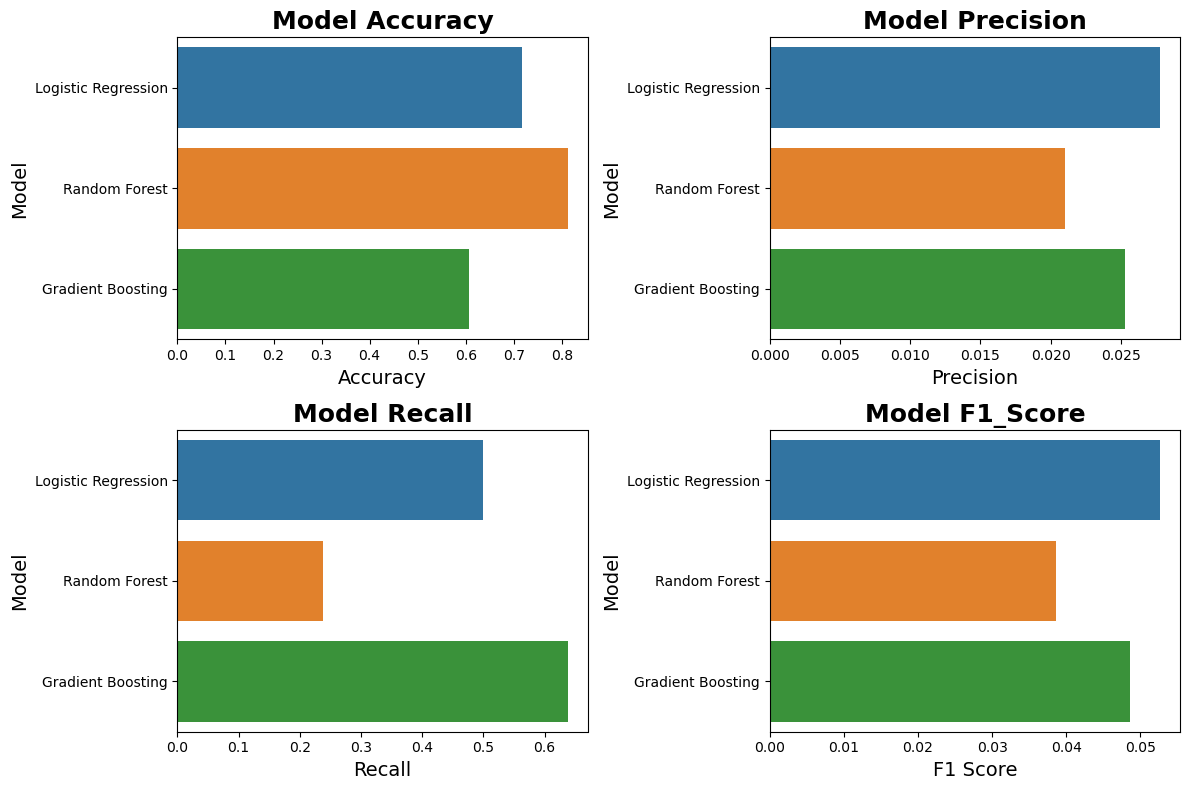

In [546]:
# Visualizing results

# color pallate
colors = sns.color_palette("Paired")
# creating a figure with subplots
fig, axes = plt.subplots(2 ,2, figsize = (12, 8))

# Model Accuracy 
sns.barplot(x = "Accuracy", y = "Model", data = results, ax = axes[0, 0])
axes[0, 0].set_title("Model Accuracy", fontsize = 18, weight = "bold")
axes[0, 0].set_xlabel("Accuracy", fontsize = 14)
axes[0, 0].set_ylabel("Model", fontsize = 14)

# Model Precision 
sns.barplot(x = "Precision", y = "Model", data = results, ax = axes[0, 1])
axes[0, 1].set_title("Model Precision", fontsize = 18, weight = "bold")
axes[0, 1].set_xlabel("Precision", fontsize = 14)
axes[0, 1].set_ylabel("Model", fontsize = 14)

# Model Recall 
sns.barplot(x = "Recall", y = "Model", data = results, ax = axes[1, 0])
axes[1, 0].set_title("Model Recall", fontsize = 18, weight = "bold")
axes[1, 0].set_xlabel("Recall", fontsize = 14)
axes[1, 0].set_ylabel("Model", fontsize = 14)

# Model F1 Score 
sns.barplot(x = "F1 Score", y = "Model", data = results, ax = axes[1, 1])
axes[1, 1].set_title("Model F1_Score", fontsize = 18, weight = "bold")
axes[1, 1].set_xlabel("F1 Score", fontsize = 14)
axes[1, 1].set_ylabel("Model", fontsize = 14)

plt.tight_layout()
plt.show()


# Model Performance Analysis

## Key Metrics Overview
- **Accuracy**: Overall correctness of predictions.
- **Precision**: How many selected positives are truly positive (avoid false positives).
- **Recall (Sensitivity)**: How many actual positives were correctly identified (avoid false negatives).
- **F1 Score**: Harmonic mean of precision and recall (balances both).
- **AUC**: Model's ability to distinguish classes (1 = perfect, 0.5 = random).

## Results Summary
| Model              | Accuracy | Precision | Recall | F1 Score | AUC     |
|--------------------|----------|-----------|--------|----------|---------|
| Logistic Regression| 0.714    | 0.028     | 0.507  | 0.053    | 0.667   |
| Random Forest      | 0.800    | 0.021     | 0.251  | 0.038    | 0.573   |
| Gradient Boosting  | 0.567    | 0.025     | 0.684  | 0.048    | 0.667   |

## Why Logistic Regression is Best

1. **Highest AUC (0.667)**
   - Best at distinguishing between classes (Random Forest's 0.573 is near-random)

2. **Most Balanced Performance**
   - Recall (0.507): 2× better than Random Forest (0.251)
   - Precision (0.028): Slightly better than Gradient Boosting (0.025)

3. **Avoids Pitfalls of Other Models**
   - Random Forest's high accuracy (0.800) is misleading due to likely class imbalance
   - Gradient Boosting has terrible precision despite good recall
